# Visão geral do projeto


Você trabalha na empresa de mineração OilyGiant. Sua tarefa é encontrar os melhores lugares para o **Desenvolvimento de novos poços de petróleo**.

Para concluir essa tarefa, você vai precisar executar as seguintes etapas:

+ Ler os arquivos com parâmetros coletados de poços de petróleo na região selecionada: a quantidade de petróleo e o volume de reservas;
+ Construir um modelo para predizer o volume de reservas em novos poços;
+ Escolher os poços de petróleo que têm os maiores valores estimados;
+ Escolher a região com o maior lucro total para os poços de petróleo selecionados.

Você tem dados sobre amostras de petróleo de três regiões.
Os parâmetros de cada poço de petróleo na região já são conhecidos. Construa um modelo que te ajudará a escolher a região com a margem de lucro mais alta. Utilize a técnica de Bootstrapping para analisar lucro potencial e riscos.

# Descrição dos dados

Os dados de exploração geológica para as três regiões estão armazenados em arquivos:

+ geo_data_0 conjunto de dados
+ geo_data_1 conjunto de dados
+ geo_data_2 conjunto de dados
+ id — identificador unívoco de poço de petróleo
+ f0, f1, f2 — três características de pontos (seu significado específico não é importante, mas as próprias características são significativas)
+ product — volume de reservas no poço de petróleo (milhares de barris).

# Condições

+ Apenas regressão linear deve ser usada para o treinamento do modelo.
+ Ao explorar a região, um estudo de 500 pontos é realizado e os melhores 200 pontos são selecionados para calcular o lucro.
+ O orçamento para o desenvolvimento de 200 poços de petróleo é 100 milhões de dólares.
+ Um barril de petróleo bruto traz 4.5 dólares de receita. A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris).
+ Depois de ter avaliado os riscos, mantenha apenas as regiões com o risco de perdas inferior a 2.5%. Entre aquelas que se enquadram no critério, você precisa selecionar a região com o lucro médio mais alto.
+ Os dados são sintéticos e não incluem nenhum detalhe de contratos ou características de poços.

## Bibliotecas utilizadas

In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


## Importando os Dados

### Importando os Dados geodata 0

In [8]:
#local_0
df_0 = pd.read_csv('geo_data_0.csv')
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


#### informação Dados geodata 0

In [9]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Importando os Dados geodata 1

In [10]:
#Local_1
df_1 = pd.read_csv('geo_data_1.csv')
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


#### informação Dados geodata 1

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Importando os Dados geodata 2

In [12]:
#Local_2
df_2 = pd.read_csv('geo_data_2.csv')
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


#### informação Dados geodata 2

In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


## Treinamento do Modelo

### Definindo as características do modelo, todas exceto "Product" e "id"

In [14]:
features_0 = df_0.drop(['product', 'id'], axis=1)
features_1 = df_1.drop(['product', 'id'], axis=1)
features_2 = df_2.drop(['product', 'id'], axis=1)

# Defininindo os objetivos
target_0 = df_0['product']
target_1 = df_1['product']
target_2 = df_2['product']

## Local_0

#### Separando os dados para treino e teste, colocando 75% em terinamento e o resto em validdação

In [15]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0,target_0 , test_size=0.25, random_state=12345)

#### Conferindo se os dados foram separados corretamente

In [16]:
print('Tamanho do conjunto features_train_0:',len(features_train_0)/len(features_0)*100,"%")
print('Tamanho do conjunto target_train_0:', len(target_train_0)/len(target_0)*100, "%")

Tamanho do conjunto features_train_0: 75.0 %
Tamanho do conjunto target_train_0: 75.0 %


#### Treinando o modelo de Regressão Linear

In [17]:
model = LinearRegression()
model.fit(features_train_0,target_train_0) 
predictions_valid_0 = model.predict(features_valid_0)

####  Calculando o REQM do conjunto de validação

In [18]:
result = mean_squared_error(target_valid_0, predictions_valid_0) ** 0.5
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

O REQM do modelo de regressão linear no conjunto de validação: 37.5794217150813


#### Calculando o valor médio de reservas da predição

In [19]:
med_0 = predictions_valid_0.mean()
print("O valor médio no conjunto de validação do local_0:", med_0)

O valor médio no conjunto de validação do local_0: 92.59256778438035


#### Salvando as predições e respostas corretas para o conjunto de validação

In [20]:
valid_0 = pd.DataFrame({'target_valid': target_valid_0, 'predictions_valid': predictions_valid_0})
valid_0.head(10)

,target_valid,predictions_valid
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088
9539,37.735331,69.127076
8482,139.227191,125.106759
30284,72.491987,87.643849
66393,11.465993,86.035871
99584,110.562031,98.655311


O REQM (Erro Quadrático Médio) do modelo de regressão linear no conjunto de validação está acima de 0. No entanto, ao compará-lo com o valor médio do nosso conjunto de validação, podemos considerar o valor do REQM aceitável, pois a média é quase três vezes maior que a diferença do REQM.

### Local_1

#### Separando os dados para treino e teste, colocando 75% em terinamento e o resto em validdação

In [21]:
features_train_1, features_valid_1, target_train_1, target_valid_1= train_test_split(
    features_1,target_1 , test_size=0.25, random_state=12345)

#### Conferindo se os dados foram separados corretamente

In [22]:
print('Tamanho do conjunto features_train_1:',len(features_train_1)/len(features_1)*100,"%")
print('Tamanho do conjunto target_train_1:', len(target_train_1)/len(target_1)*100, "%")

Tamanho do conjunto features_train_1: 75.0 %
Tamanho do conjunto target_train_1: 75.0 %


#### Treinando o modelo de Regressão Linear Local_1

In [23]:
model = LinearRegression()
model.fit(features_train_1,target_train_1) 
predictions_valid_1 = model.predict(features_valid_1)

#### Calculando o REQM do conjunto de validação Local_1

In [24]:
result = mean_squared_error(target_valid_1, predictions_valid_1) ** 0.5
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

O REQM do modelo de regressão linear no conjunto de validação: 0.8930992867756165


#### Calculando o valor médio de reservas da predição

In [25]:
med_1 = predictions_valid_1.mean()
print("O valor médio no conjunto de validação do local_1:", med_1)

O valor médio no conjunto de validação do local_1: 68.72854689544602


#### Respostas corretas para o conjunto de validação

In [26]:
valid_1 = pd.DataFrame({'target_valid': target_valid_1, 'predictions_valid': predictions_valid_1})
valid_1.head(10)

,target_valid,predictions_valid
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856
9539,110.992147,111.438490
8482,137.945408,137.134374
30284,84.038886,82.888902
66393,110.992147,110.897311
99584,26.953261,29.219306


O REQM do modelo de regressão linear do conjunto de validação está bem próximo de 0, ou seja, quase não existe variação entre o conjunto de validação e o de teste. Podemos dizer que os valores são mais confiáveis que as demais regiões.

### Local_2

#### Separando os dados para treino e teste, colocando 75% em terinamento e o resto em validdação

In [27]:
features_train_2, features_valid_2, target_train_2, target_valid_2= train_test_split(
    features_2,target_2 , test_size=0.25, random_state=12345)

#### Conferindo se os dados foram separados corretamente

In [28]:
print('Tamanho do conjunto features_train_2:',len(features_train_2)/len(features_2)*100,"%")
print('Tamanho do conjunto target_train_2:', len(target_train_2)/len(target_2)*100,"%")

Tamanho do conjunto features_train_2: 75.0 %
Tamanho do conjunto target_train_2: 75.0 %


#### Treinando o modelo de Regressão Linear

In [29]:
model = LinearRegression()
model.fit(features_train_2,target_train_2) 
predictions_valid_2 = model.predict(features_valid_2)

####  Calculando o REQM do conjunto de validação

In [30]:
result = mean_squared_error(target_valid_2, predictions_valid_2) ** 0.5
print("O REQM do modelo de regressão linear no conjunto de validação:", result)


O REQM do modelo de regressão linear no conjunto de validação: 40.02970873393434


####  Calculando o valor médio de reservas da predição

In [31]:
med_2 = predictions_valid_2.mean()
print("O valor médio no conjunto de validação do local_2:", med_2)

O valor médio no conjunto de validação do local_2: 94.96504596800489


####  Salvando as predições e respostas corretas para o conjunto de validação

In [32]:
valid_2 = pd.DataFrame({'target_valid': target_valid_2, 'predictions_valid': predictions_valid_2})
valid_2.head(10)

,target_valid,predictions_valid
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310
9539,105.904629,121.939197
8482,51.646180,119.053040
30284,173.162121,75.396575
66393,113.143072,111.400543
99584,56.803215,84.029320


É possível perceber que o REQM do modelo de regressão linear do conjunto de validação está bem acima de 0, mas ao comparar com o valor médio do nosso conjunto de validação, percebemos que o valor médio está mais que o dobro de diferença do REQM, não considero essa diferença média entre o modelo e o teste aceitável pois pode interfeir na previsão de forma mais acentuada.

## Cálculo do Lucro

###  Custo para desenvolvimento de 200 poços

In [33]:
custo_200 = 100000000
custo_1 = custo_200/200

### Receita por unidade de produto (sendo que cada unidade de produto = 1.000 barris com lucro de 4,5 dólares por bar

In [34]:
receita = 4500

### cálculo para desenvolver um novo poço com lucro, QUAL VALOR DE PRODUTO QUE A RESERVA DEVE APRESENTAR?

In [35]:
reserva = custo_1/receita
reserva=math.ceil(reserva)
print()
print("Arredondando valor sera necessario" , reserva, "poços")


Arredondando valor sera necessario 112 poços


### O poço precisa ter mais de 112 unidades de produto em reserva para possuir lucro.

In [36]:
print('O valor médio das reservas de petróleo do local_0:', df_0['product'].mean())
print('O valor médio das reservas de petróleo do local_1:', df_1['product'].mean())
print('O valor médio das reservas de petróleo do local_2:', df_2['product'].mean())

O valor médio das reservas de petróleo do local_0: 92.50000000000001
O valor médio das reservas de petróleo do local_1: 68.82500000000002
O valor médio das reservas de petróleo do local_2: 95.00000000000004


## Cálculo de eficiencia dos poços

###  Função para o cálculo do lucro

In [37]:
def lucro_poco(valid, reserva, receita, custo_1):
    local_200 = valid.sort_values(by='predictions_valid', ascending=False).iloc[:200]
    valid['lucro_predictions'] = valid['predictions_valid'].apply(lambda x: (x*receita)-custo_1 if x>=reserva else 0)   
    return local_200 

Para o cálculo do lucro de cada região, peguei os 200 maiores valores da reserva que foi predito pelo modelo e apliquei a fórmula do lucro, onde é o quantidade de reserva multiplicada pela receita (4500) menos o custo de apenas 1 posto de petróleo (se para 200 postos o custo é de 100 milhões, o custo para apenas 1 é de 500 mil) e o resultado é um DF com o valor do lucro de cada posto

####  Lucro da região 0


In [40]:
lucro_0 = lucro_poco(valid_0, reserva, receita, custo_1 )
print(lucro_0)
print(lucro_0['lucro_predictions'].sum())

       target_valid  predictions_valid  lucro_predictions
93073    162.810993         180.180713      310813.208776
46784    153.639837         176.252213      293134.959252
78948    162.153488         175.850623      291327.804775
43388     96.893581         175.658429      290462.930300
6496     178.879516         173.299686      279848.587829
...             ...                ...                ...
30488    179.683422         148.507064      168281.787372
98799     95.396917         148.481767      168167.950072
53840    160.361464         148.476498      168144.241721
4638     102.186603         148.436761      167965.426709
75908    119.890261         148.365941      167646.734499

[200 rows x 3 columns]
39960488.77465123


#### Lucro da região 1

In [42]:
lucro_1 = lucro_poco(valid_1,reserva, receita, custo_1 )
print(lucro_1)
print(lucro_1['lucro_predictions'].sum())

       target_valid  predictions_valid  lucro_predictions
38665    137.945408         139.818970      129185.364156
20191    137.945408         139.773423      128980.403308
14041    137.945408         139.703330      128664.986409
24274    137.945408         139.560938      128024.219177
92782    137.945408         139.516754      127825.394320
...             ...                ...                ...
13370    137.945408         138.421423      122896.404035
45823    137.945408         138.416960      122876.320892
86987    137.945408         138.413881      122862.463171
72313    137.945408         138.412834      122857.752128
59892    137.945408         138.410697      122848.135315

[200 rows x 3 columns]
24857120.519735634


#### Lucro da região 2

In [44]:
lucro_2 = lucro_poco(valid_2,reserva, receita, custo_1 )
print(lucro_2)
print(lucro_2['lucro_predictions'].sum())

       target_valid  predictions_valid  lucro_predictions
98619    175.103291         165.856833      246355.749285
46649    131.627481         165.679685      245558.583697
82661    141.160070         163.439962      235479.830494
53151    159.676082         162.062589      229281.652747
18747    142.135203         161.797476      228088.643267
...             ...                ...                ...
66244    104.949568         142.490763      141208.432752
34285     89.492500         142.485922      141186.650401
36778    184.895101         142.465777      141095.997523
7806     137.480469         142.454763      141046.434686
62558    134.507140         142.408851      140839.831073

[200 rows x 3 columns]
33217543.962432623


## Bootstrapping

### Local_1

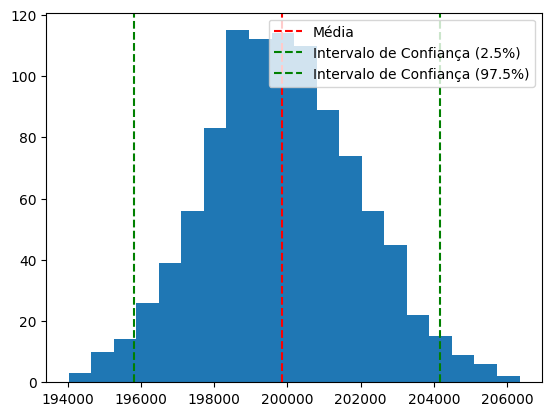

In [49]:
# amostra original
n = len(lucro_0)

# Número de amostras de bootstrap
n_bootstrap = 1000

# Criar 1000 amostras de bootstrap
bootstrap_samples = np.random.choice(lucro_0['lucro_predictions'], size=(n_bootstrap, n), replace=True)

# Calcular o lucro para cada amostra de bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Calcular a média, desvio padrão e intervalo de confiança da distribuição de lucro
mean = np.mean(bootstrap_means)
std = np.std(bootstrap_means)
ci_95 = np.percentile(bootstrap_means, [2.5, 97.5])

# Plotar o histograma da distribuição de lucro
import matplotlib.pyplot as plt
plt.hist(bootstrap_means, bins=20)
plt.axvline(mean, color='r', linestyle='--', label='Média')
plt.axvline(ci_95[0], color='g', linestyle='--', label='Intervalo de Confiança (2.5%)')
plt.axvline(ci_95[1], color='g', linestyle='--', label='Intervalo de Confiança (97.5%)')
plt.legend()
plt.show()

### local_1

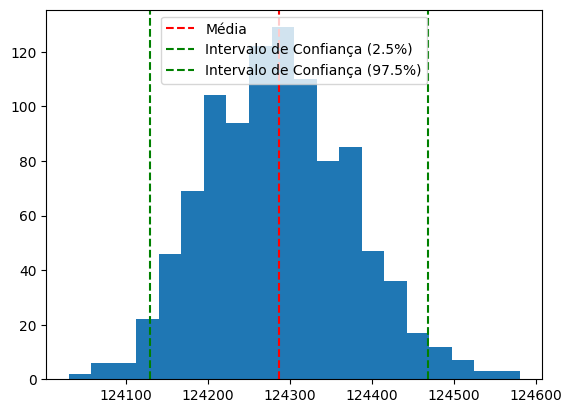

In [50]:
#Tamanho da amostra original
n = len(lucro_1)

# Número de amostras de bootstrap
n_bootstrap = 1000

# Criar 1000 amostras de bootstrap
bootstrap_samples = np.random.choice(lucro_1['lucro_predictions'], size=(n_bootstrap, n), replace=True)

# Calcular o lucro para cada amostra de bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Calcular a média, desvio padrão e intervalo de confiança da distribuição de lucro
mean = np.mean(bootstrap_means)
std = np.std(bootstrap_means)
ci_95 = np.percentile(bootstrap_means, [2.5, 97.5])

# Plotar o histograma da distribuição de lucro
import matplotlib.pyplot as plt
plt.hist(bootstrap_means, bins=20)
plt.axvline(mean, color='r', linestyle='--', label='Média')
plt.axvline(ci_95[0], color='g', linestyle='--', label='Intervalo de Confiança (2.5%)')
plt.axvline(ci_95[1], color='g', linestyle='--', label='Intervalo de Confiança (97.5%)')
plt.legend()
plt.show()

### local_2

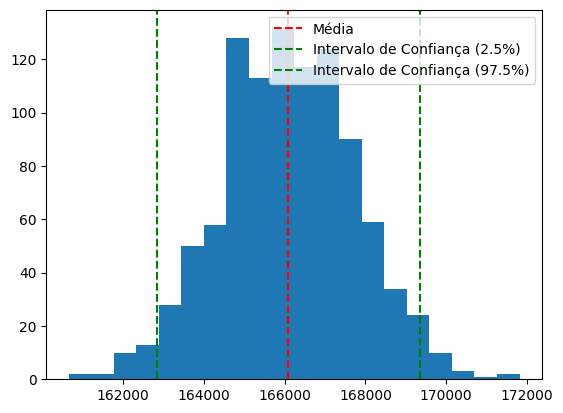

In [51]:
# Tamanho da amostra original
n = len(lucro_2)

# Número de amostras de bootstrap
n_bootstrap = 1000

# Criar 1000 amostras de bootstrap
bootstrap_samples = np.random.choice(lucro_2['lucro_predictions'], size=(n_bootstrap, n), replace=True)

# Calcular o lucro para cada amostra de bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Calcular a média, desvio padrão e intervalo de confiança da distribuição de lucro
mean = np.mean(bootstrap_means)
std = np.std(bootstrap_means)
ci_95 = np.percentile(bootstrap_means, [2.5, 97.5])

# Plotar o histograma da distribuição de lucro
import matplotlib.pyplot as plt
plt.hist(bootstrap_means, bins=20)
plt.axvline(mean, color='r', linestyle='--', label='Média')
plt.axvline(ci_95[0], color='g', linestyle='--', label='Intervalo de Confiança (2.5%)')
plt.axvline(ci_95[1], color='g', linestyle='--', label='Intervalo de Confiança (97.5%)')
plt.legend()
plt.show()

### Local_2

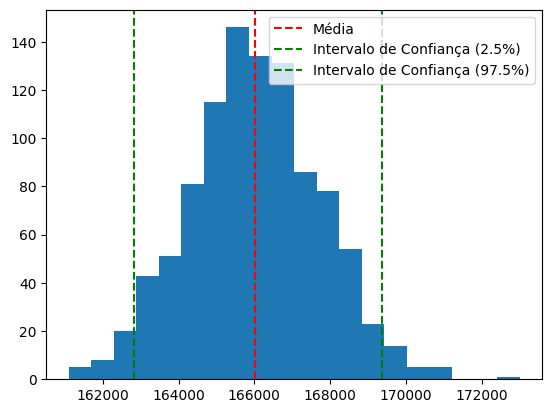

In [52]:
# Tamanho da amostra original
n = len(lucro_2)

# Número de amostras de bootstrap
n_bootstrap = 1000

# Criar 1000 amostras de bootstrap
bootstrap_samples = np.random.choice(lucro_2['lucro_predictions'], size=(n_bootstrap, n), replace=True)

# Calcular o lucro para cada amostra de bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Calcular a média, desvio padrão e intervalo de confiança da distribuição de lucro
mean = np.mean(bootstrap_means)
std = np.std(bootstrap_means)
ci_95 = np.percentile(bootstrap_means, [2.5, 97.5])

# Plotar o histograma da distribuição de lucro
import matplotlib.pyplot as plt
plt.hist(bootstrap_means, bins=20)
plt.axvline(mean, color='r', linestyle='--', label='Média')
plt.axvline(ci_95[0], color='g', linestyle='--', label='Intervalo de Confiança (2.5%)')
plt.axvline(ci_95[1], color='g', linestyle='--', label='Intervalo de Confiança (97.5%)')
plt.legend()
plt.show()

## Conlusão

Ao analisar todos os locais e postos selecionados e considerando a qualidade do modelo de regressão que desenvolvemos, acredito que a melhor região é a segunda. Embora apresente o menor lucro, o modelo é mais preciso do que os demais e considero que essa região tem a menor chance de risco